In [2]:
# For Math opperations
import numpy as np

# For reading data from outside files
import pandas as pd

# For plotting data
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

 ## Input Data

In [3]:
# address should look similar to the following: C:\Users\Ben\Desktop\REU Python\DataVis\Data\Maxima
# The last folder name should be \Maxima

#address = input("Paste Folder Address Here: ")

Paste Folder Address Here: C:\Users\Ben\Desktop\REU Python\DataVis\Data\Maxima


In [4]:
# min N, Max N, step-size
N_Data = ['500','1950','10']

# min S, max S, step-size
S_Data = ['0.0','0.5','.001']

In [5]:
# creates a variable for the .format() function which call specified files in \Maxima
Folder = address + '\\{}_s0.0-0.5.csv'

In [6]:
nvals = []
svals = []
mvals = []

for n in range(int(N_Data[0]), int(N_Data[1])+int(N_Data[2]), int(N_Data[2])):
    filenew = Folder.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    for m in range(len(numbers['n'])):
        nvals.append(numbers['n'][m])
        svals.append(numbers['s'][m])
        mvals.append(numbers['m'][m])

nSorted = np.array(nvals, dtype=object)
sSorted = np.array(svals, dtype=object)
mSorted = np.array(mvals, dtype=object)

## Fixed S

In [7]:
# For some reason trying to create mlist in the function above breaks things
nlist = []
slist = []
mlist = []

for n in range(int(N_Data[0]), int(N_Data[1])+int(N_Data[2]), int(N_Data[2])):
    filenew = Folder.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    nlist.append(list(numbers['n']))
    slist.append(list(numbers['s']))
    mlist.append(list(numbers['m']))

In [22]:
S = float(input("Input Desired s Value: "))

Input Desired s Value: .5


In [23]:
# The index function tells us the index of our S value so we can ensure a proper zip with the future m values
Index = slist[0].index(S)

In [24]:
nFixed = []
mFixed = []

for s in range(len(slist)):
    if S in slist[s]:
        nFixed.append(nlist[s][Index])
        mFixed.append(mlist[s][Index])
        
nFixed = np.array(nFixed)
mFixed = np.array(mFixed)

In [25]:
def fixs(x,a,b):
    return a*(np.log(x)**b)

popt,tcov = curve_fit(fixs, nFixed, mFixed)

For a*(ln(n)^b) you have a,b values: 
[1.02873747 0.13022836]


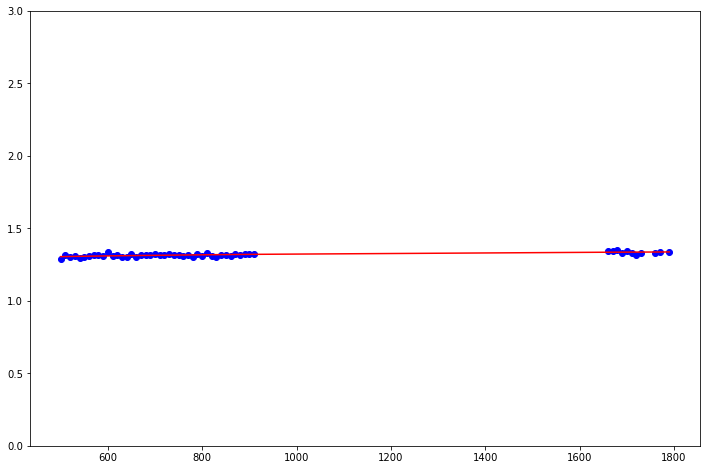

In [26]:
%matplotlib inline
f = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)
ax1.set_ylim(0,int(np.ceil(max(mFixed)))+1)


ax1.scatter(nFixed, mFixed, c='blue')
ax1.plot(nFixed, fixs(nFixed, *popt), c='red')

print("For a*(ln(n)^b) you have a,b values: ")
print(popt)
plt.show()

# 3D Plot

<IPython.core.display.Javascript object>


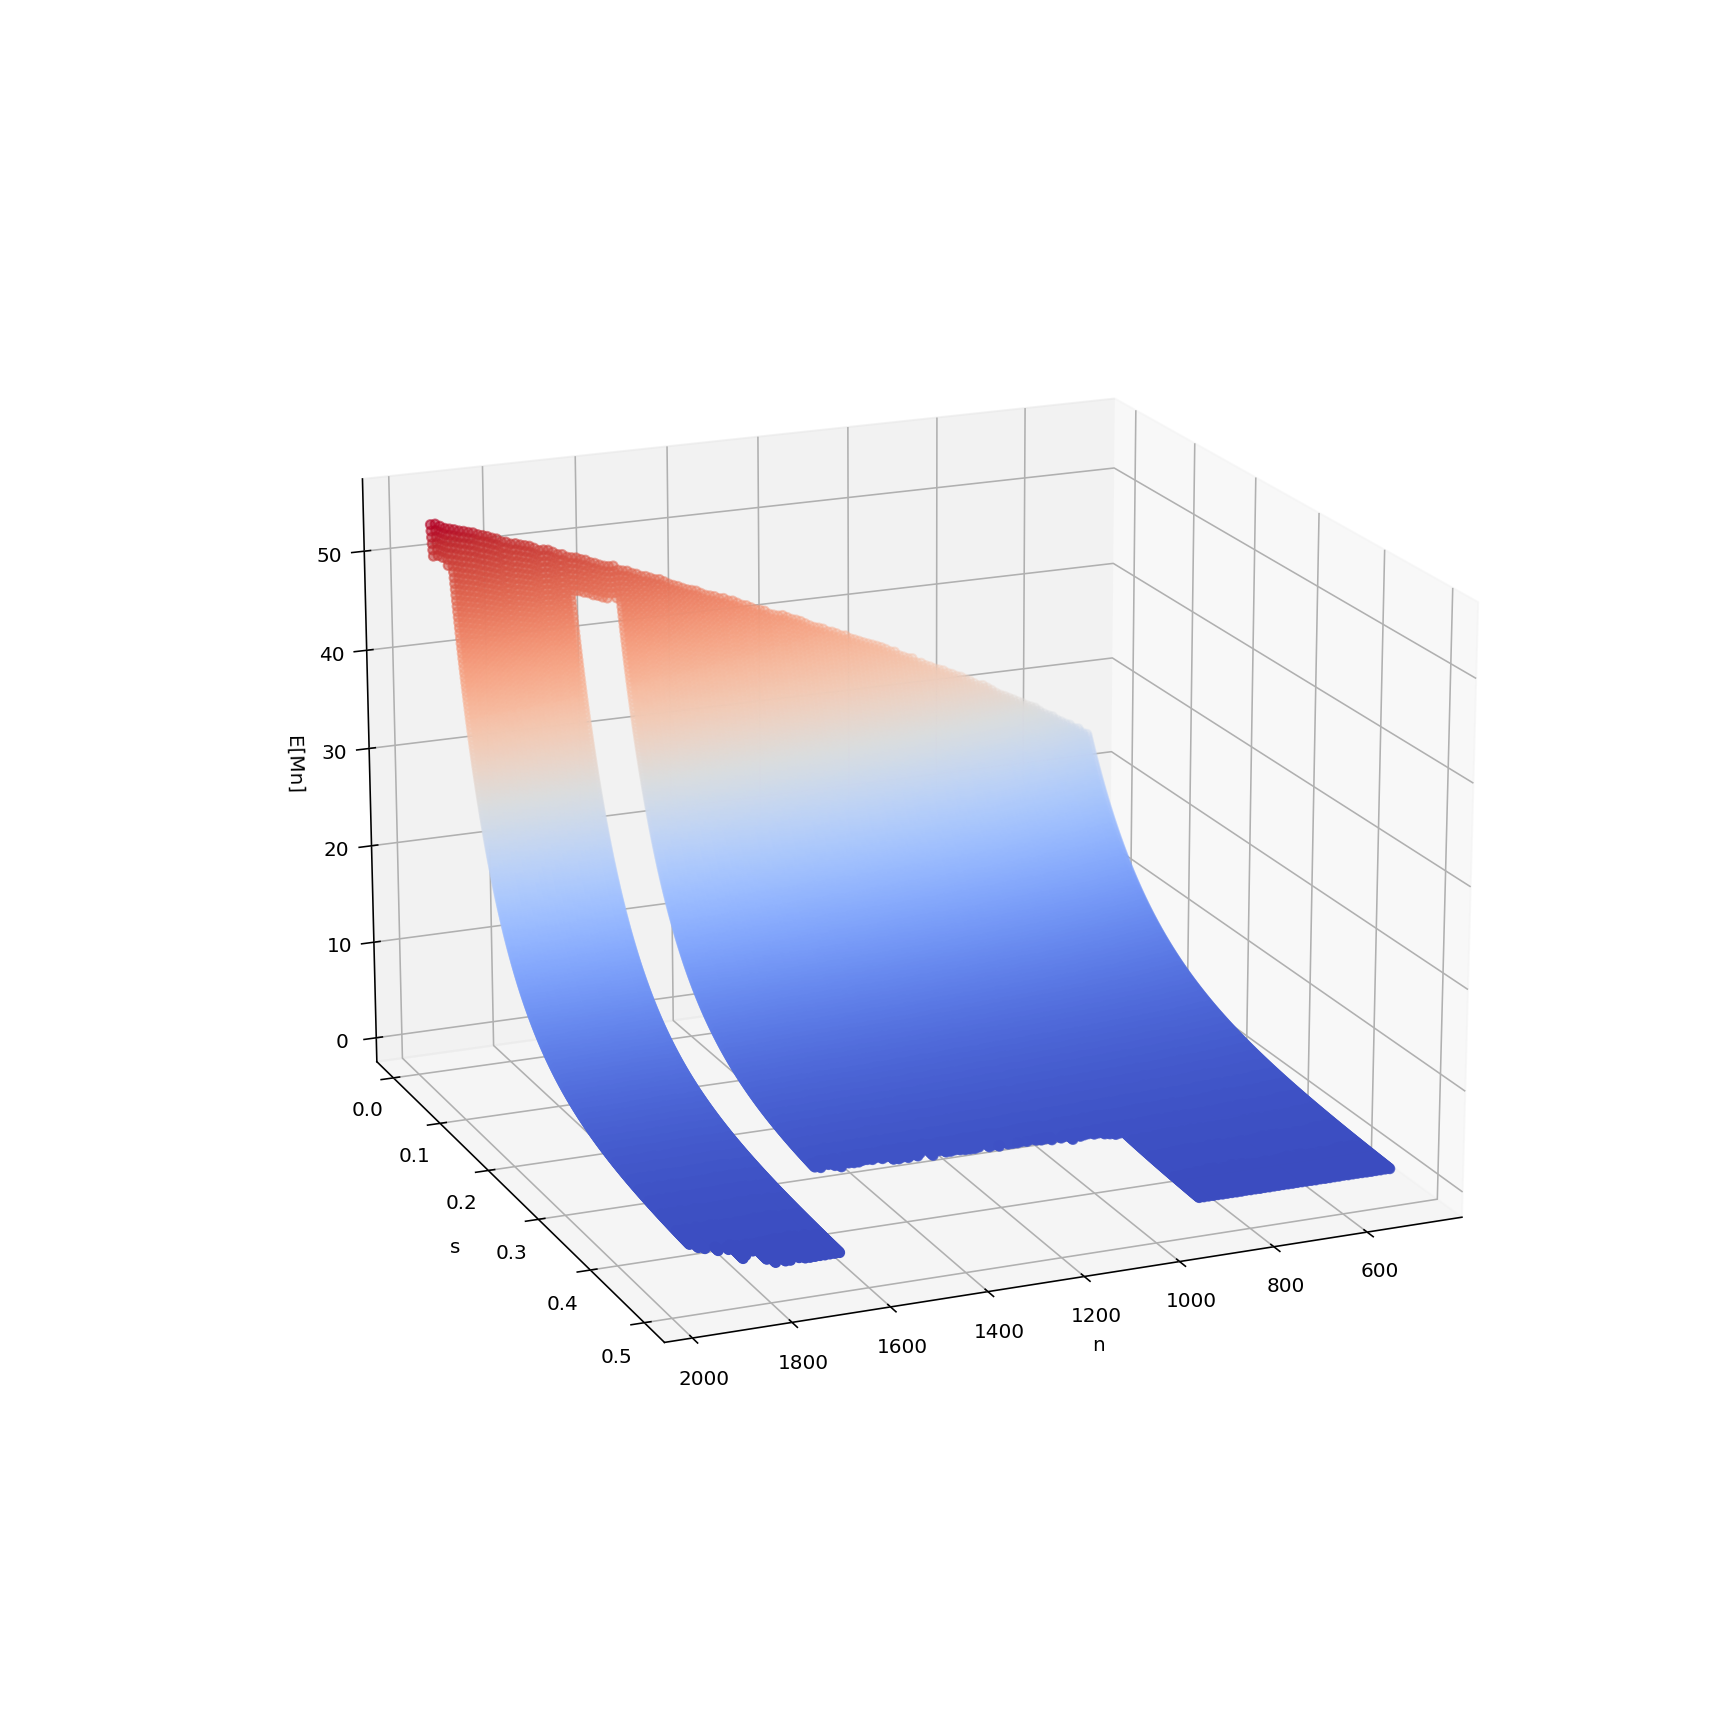

In [31]:
%matplotlib notebook
f = plt.figure(figsize = (12,12))
ax1 = plt.axes(projection = '3d')

ax1.set_xlabel('n')
ax1.set_ylabel('s')
ax1.set_zlabel('E[Mn]')
ax1.scatter3D(nSorted, sSorted, mSorted, cmap='coolwarm', c=mSorted)

plt.show()